<a href="https://colab.research.google.com/github/sharadnatarajSJSU/CMPE_255_Dimensionality_red/blob/main/CMPE_255_Dimensionality_reduction_Image_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

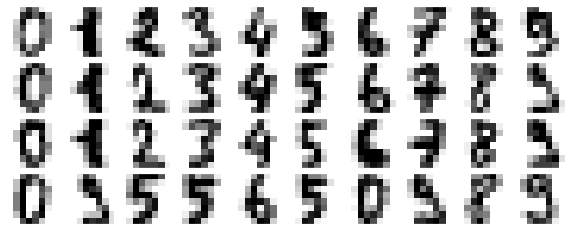

In [ ]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [ ]:
pca_data = pca.fit_transform(digits.data)

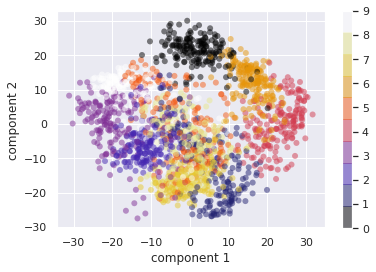

In [ ]:
plt.scatter(pca_data[:, 0], pca_data[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('CMRmap', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [ ]:
print(pca.explained_variance_ratio_)

[0.14890594 0.13618771]


In [ ]:
print(pca.components_)

[[ 6.65398027e-18 -1.73094672e-02 -2.23428844e-01 -1.35913250e-01
  -3.30322759e-02 -9.66340705e-02 -8.32940769e-03  2.26901031e-03
  -3.20516746e-04 -1.19308932e-01 -2.44451687e-01  1.48512822e-01
  -4.67319290e-02 -2.17740750e-01 -1.48136392e-02  4.47780296e-03
  -4.94136766e-05 -7.95419864e-02  8.33951149e-02  2.15915409e-01
  -1.72126867e-01 -1.63712115e-01  2.86444811e-02  4.23252065e-03
   9.85488488e-05  6.42318656e-02  2.54093264e-01 -3.56770385e-02
  -2.09462609e-01 -4.31311140e-02  5.13118993e-02  2.13422874e-04
   0.00000000e+00  1.59950843e-01  3.68690750e-01  1.64406849e-01
   8.52007533e-02  3.72983127e-02  2.15867241e-02  0.00000000e+00
   1.28865565e-03  1.06945254e-01  3.03067430e-01  2.47813039e-01
   2.09637262e-01  1.22325179e-02 -3.69458141e-02  1.61485256e-03
   6.93023803e-04 -8.35144714e-03 -5.58599005e-02  9.30534954e-02
   1.07387746e-01 -1.37734555e-01 -6.32879291e-02  9.61676207e-04
   9.55078571e-06 -1.40786859e-02 -2.35675497e-01 -1.41225520e-01
  -9.15963

#SVD

In [ ]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [ ]:
vmin = 0
vmax = 1
image_bias = 1 # sometimes 1
def plot_svd(A):
    n = len(A)
    imshow(image_bias-A, cmap='gray', vmin=vmin, vmax=vmax)
    plt.show()
    U, S, V = svd(A)

    imgs = []
    for i in range(n):
        imgs.append(S[i]*np.outer(U[:,i],V[i]))

    combined_imgs = []
    for i in range(n):
        img = sum(imgs[:i+1])
        combined_imgs.append(img)
        
    fig, axes = plt.subplots(figsize = (n*n,n), nrows = 1, ncols = n, sharex=True, sharey=True)
    for num, ax in zip(range(n), axes):
        ax.imshow(image_bias-imgs[num], cmap='gray', vmin=vmin, vmax=vmax)
        ax.set_title(np.round(S[num],2), fontsize=80)
    plt.show()
    
    fig, axes = plt.subplots(figsize = (n*n,n), nrows = 1, ncols = n, sharex=True, sharey=True)
    for num, ax in zip(range(n), axes):
        ax.imshow(image_bias-combined_imgs[num], cmap='gray', vmin=vmin, vmax=vmax)
    plt.show()

    return U,S,V

In [ ]:
imgmat_lle = imgmat[:2000,:2000]

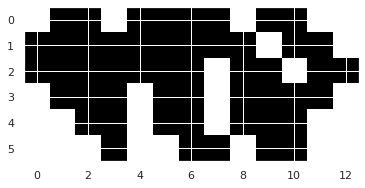

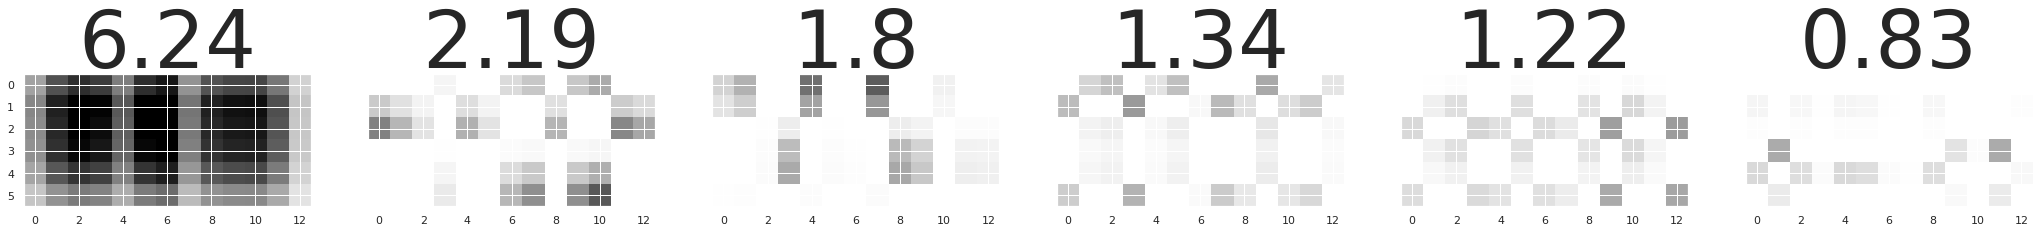

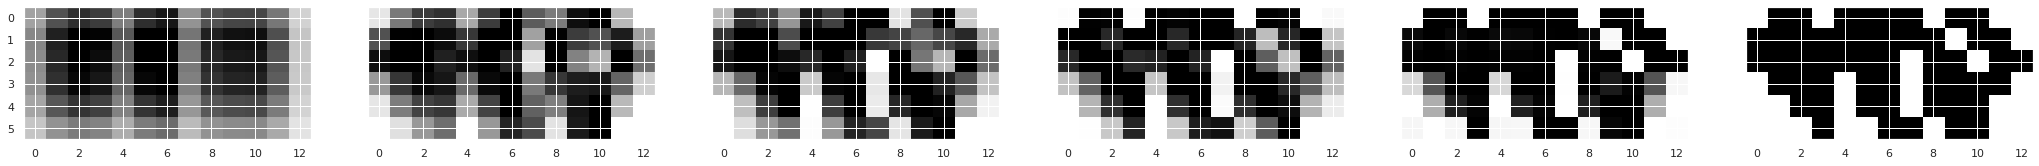

In [ ]:
D = np.array([[0,1,1,0,1,1,1,1,0,1,1,0,0],
              [1,1,1,1,1,1,1,1,1,0,1,1,0],
              [1,1,1,1,1,1,1,0,1,1,0,1,1],
              [0,1,1,1,0,1,1,0,1,1,1,1,0],
              [0,0,1,1,0,1,1,0,1,1,1,0,0],
              [0,0,0,1,0,0,1,1,0,1,1,0,0],
             ])
U,S,V = plot_svd(D)

LLE

In [ ]:
def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified',
                               eigen_solver='dense')
out = model.fit_transform(XS)

fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15);

In [ ]:
from sklearn.datasets import make_swiss_roll

In [ ]:
X, color = make_swiss_roll(n_samples=1500)

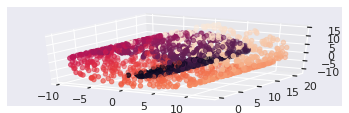

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(211, projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2],c = color)

#reducing the dimensions of the original swiss roll

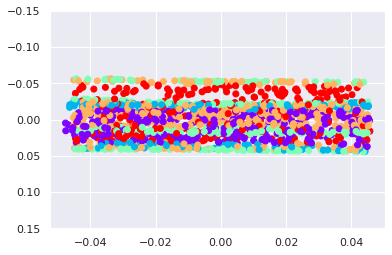

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified',
                               eigen_solver='dense')
out = model.fit_transform(X)

fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15);

#T-SNE on the same Swiss roll

In [ ]:
from sklearn import manifold, datasets
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(random_state=0,perplexity=100)
tsne_data = tsne.fit_transform(X)

In [ ]:
tsne_data

array([[ 12.98614  , -14.417192 ],
       [  5.7425723,  -8.192924 ],
       [  3.5575376,  -6.145847 ],
       ...,
       [ -4.057023 , -27.044664 ],
       [  6.712214 ,  -3.628546 ],
       [-17.068884 ,   6.556158 ]], dtype=float32)

No handles with labels found to put in legend.


Text(0.5, 1.0, 't-SNE embedding of data')

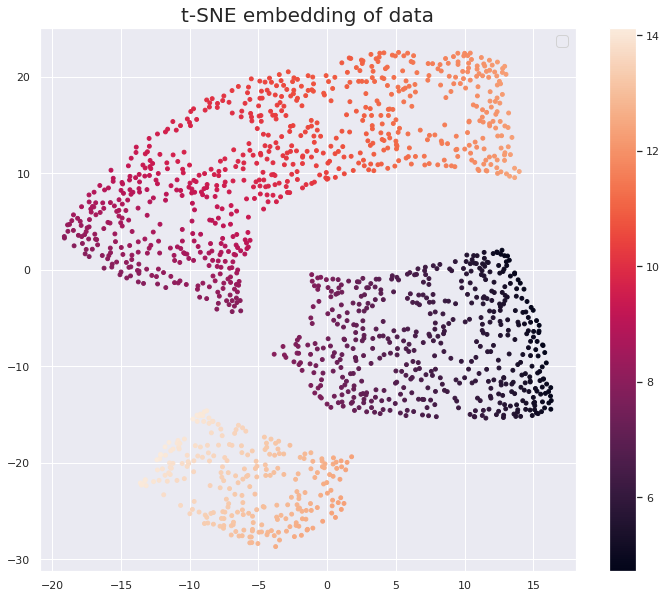

In [ ]:
cm = plt.cm.get_cmap('RdYlBu')
plt.figure(figsize=(12,10))
cb = plt.scatter(tsne_data[:,0],tsne_data[:,1], c = color,marker='o', s=15)
plt.colorbar(cb)
plt.legend(prop={'size':15})
plt.title('t-SNE embedding of train & test data', fontsize=20)
plt.title('t-SNE embedding of data', fontsize=20)


#Reduced dimensionality for the Swiss roll data set 

In [ ]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
ISOmap_data = model.fit_transform(X)
ISOmap_data.shape

(1500, 2)

Swiss roll after reduced dimenssions using ISOMAP

No handles with labels found to put in legend.


Text(0.5, 1.0, 'ISOMAP embedding of data')

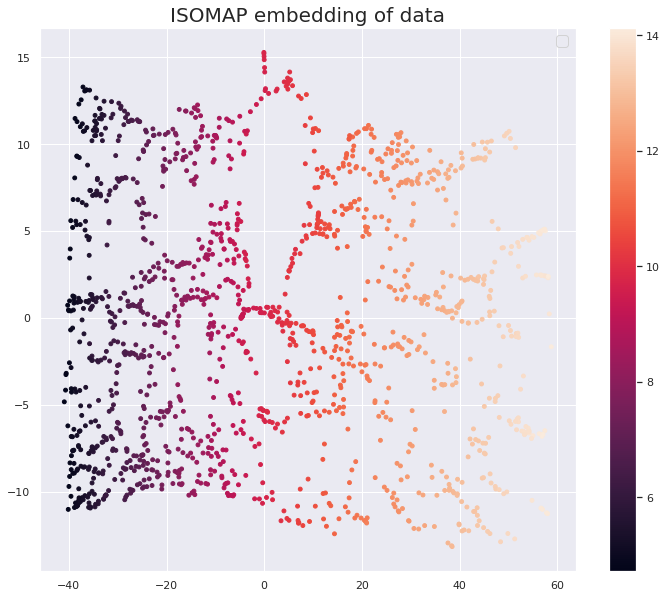

In [ ]:
cm = plt.cm.get_cmap('RdYlBu')
plt.figure(figsize=(12,10))
cb = plt.scatter(ISOmap_data[:,0],ISOmap_data[:,1], c = color,marker='o', s=15)
plt.colorbar(cb)
plt.legend(prop={'size':15})
plt.title('ISOMAP embedding of train & test data', fontsize=20)
plt.title('ISOMAP embedding of data', fontsize=20)

#UMAP

In [ ]:
!pip install scprep phate umap-learn

     |████████████████████████████████| 104 kB 2.7 MB/s 
     |████████████████████████████████| 86 kB 3.2 MB/s 
     |████████████████████████████████| 416 kB 6.8 MB/s 
     |████████████████████████████████| 45 kB 3.1 MB/s 
     |████████████████████████████████| 1.8 MB 36.1 MB/s 
     |████████████████████████████████| 1.1 MB 37.7 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=672c1599344aada2af3cbcde7145829810bb63c64377b676eb9e663be9d05906
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=ace8938e09558789cad99a40867a930e111f9ed0846838dffd8c326dadc19643
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [ ]:
import umap
model = umap.UMAP()
umap_Data = model.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


Swiss roll after dimenssionality reduction using UMAP

No handles with labels found to put in legend.


Text(0.5, 1.0, 'UMAP embedding of data')

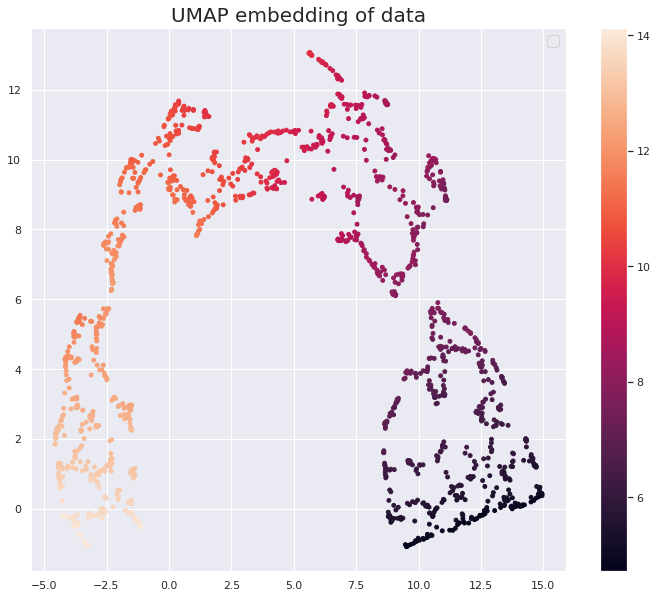

In [ ]:
cm = plt.cm.get_cmap('RdYlBu')
plt.figure(figsize=(12,10))
cb = plt.scatter(umap_Data[:,0],umap_Data[:,1], c = color,marker='o', s=15)
plt.colorbar(cb)
plt.legend(prop={'size':15})
plt.title('UMAP embedding of train & test data', fontsize=20)
plt.title('UMAP embedding of data', fontsize=20)